In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [ ]:
df = pd.read_csv('diseasesPrediction.csv')


In [ ]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
df.shape

(4920, 133)

In [ ]:
df.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [ ]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
df.describe().round(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,...,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00
mean,0.14,0.16,0.02,0.05,0.02,0.16,0.14,0.05,0.05,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
std,0.34,0.37,0.15,0.21,0.15,0.37,0.35,0.21,0.21,0.15,...,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
symptoms=df.drop('prognosis',axis=1)

In [ ]:
symptoms.shape

(4920, 132)

In [ ]:
for x in symptoms.columns:
  print(x)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [ ]:
prognosis=df['prognosis']

In [ ]:
prognosis

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [ ]:
list=np.sum(symptoms == 1, axis=1)
print(max(list))
print(min(list))

17
3


In [ ]:
correlation_matrix = symptoms.corr()
correlation_matrix

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [ ]:
len(prognosis.unique())

41

In [ ]:
prognosis_counts=prognosis.value_counts()
prognosis_counts

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [ ]:
label = prognosis_counts.index
value_count = prognosis_counts.values

In [ ]:
import matplotlib.pyplot as plt

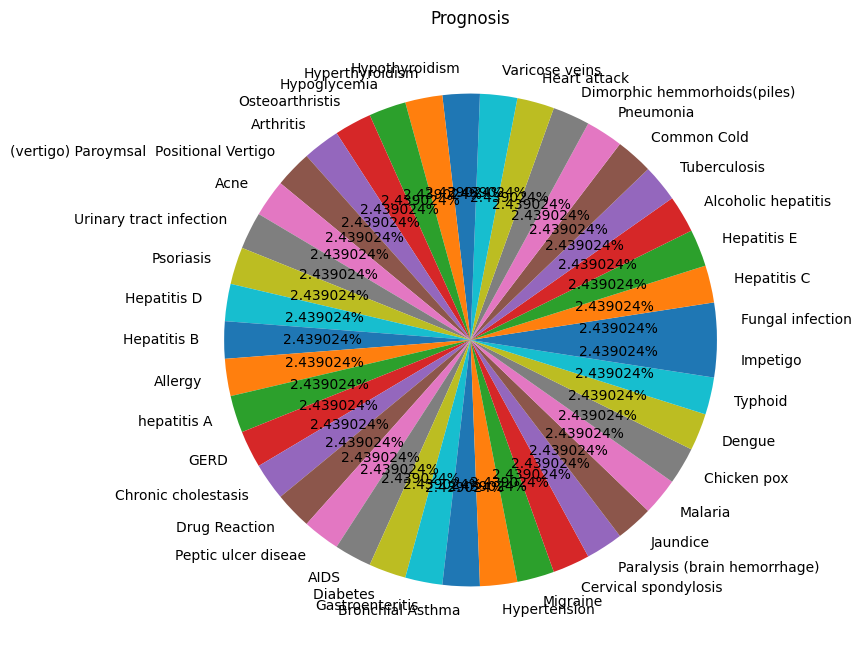

In [ ]:
fig=plt.figure(figsize=(10,8))
plt.pie(value_count,labels=label,autopct='%1f%%')
plt.title('Prognosis')
plt.show()

In [ ]:
y_encoded=encoder.fit_transform(prognosis)

In [ ]:
for i in y_encoded:
    print(i)

15
15
15
15
15
15
15
15
15
15
4
4
4
4
4
4
4
4
4
4
16
16
16
16
16
16
16
16
16
16
9
9
9
9
9
9
9
9
9
9
14
14
14
14
14
14
14
14
14
14
33
33
33
33
33
33
33
33
33
33
1
1
1
1
1
1
1
1
1
1
12
12
12
12
12
12
12
12
12
12
17
17
17
17
17
17
17
17
17
17
6
6
6
6
6
6
6
6
6
6
23
23
23
23
23
23
23
23
23
23
30
30
30
30
30
30
30
30
30
30
7
7
7
7
7
7
7
7
7
7
32
32
32
32
32
32
32
32
32
32
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
8
8
8
8
8
8
8
8
8
8
11
11
11
11
11
11
11
11
11
11
37
37
37
37
37
37
37
37
37
37
40
40
40
40
40
40
40
40
40
40
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
3
3
3
3
3
3
3
3
3
3
36
36
36
36
36
36
36
36
36
36
10
10
10
10
10
10
10
10
10
10
34
34
34
34
34
34
34
34
34
34
13
13
13
13
13
13
13
13
13
13
18
18
18
18
18
18
18
18
18
18
39
39
39
39
39
39
39
39
39
39
26
26
26
26
26
26
26
26
26
26
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
31
31
31
31
31
31
31
31
31
31
5
5
5
5
5
5
5
5
5
5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(symptoms,y_encoded,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=12,random_state=42,max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=12, random_state=42)

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9623983739837398


In [ ]:
import pickle
filename="DiseasesModel.save"
pickle.dump(rf,open(filename,'wb'))
pickle.dump(encoder,open('encoder.save','wb'))

In [ ]:
load_model=pickle.load(open(filename,'rb'))
load_encoder=pickle.load(open('encoder.save','rb'))

In [ ]:
prognosis[4808]

'Migraine'

In [ ]:
prognosis[4900]

'Hepatitis C'

In [ ]:
test={
    'itching': 1,
    'skin_rash': 1,
    'nodal_skin_eruptions': 1,
    'continuous_sneezing': 0,
    'shivering': 0,
    'chills': 0,
    'joint_pain': 0,
    'stomach_pain': 0,
    'acidity': 0,
    'ulcers_on_tongue': 0,
    'muscle_wasting': 0,
    'vomiting': 0,
    'burning_micturition': 0,
    'spotting_urination': 0,
    'fatigue': 0,
    'weight_gain': 0,
    'anxiety': 0,
    'cold_hands_and_feets': 0,
    'mood_swings': 0,
    'weight_loss': 0,
    'restlessness': 0,
    'lethargy': 0,
    'patches_in_throat': 0,
    'irregular_sugar_level': 0,
    'cough': 0,
    'high_fever': 0,
    'sunken_eyes': 0,
    'breathlessness': 0,
    'sweating': 0,
    'dehydration': 0,
    'indigestion': 0,
    'headache': 0,
    'yellowish_skin': 0,
    'dark_urine': 0,
    'nausea': 0,
    'loss_of_appetite': 0,
    'pain_behind_the_eyes': 0,
    'back_pain': 0,
    'constipation': 0,
    'abdominal_pain': 0,
    'diarrhoea': 0,
    'mild_fever': 0,
    'yellow_urine': 0,
    'yellowing_of_eyes': 0,
    'acute_liver_failure': 0,
    'fluid_overload': 0,
    'swelling_of_stomach': 0,
    'swelled_lymph_nodes': 0,
    'malaise': 0,
    'blurred_and_distorted_vision': 0,
    'phlegm': 0,
    'throat_irritation': 0,
    'redness_of_eyes': 0,
    'sinus_pressure': 0,
    'runny_nose': 0,
    'congestion': 0,
    'chest_pain': 0,
    'weakness_in_limbs': 0,
    'fast_heart_rate': 0,
    'pain_during_bowel_movements': 0,
    'pain_in_anal_region': 0,
    'bloody_stool': 0,
    'irritation_in_anus': 0,
    'neck_pain': 0,
    'dizziness': 0,
    'cramps': 0,
    'bruising': 0,
    'obesity': 0,
    'swollen_legs': 0,
    'swollen_blood_vessels': 0,
    'puffy_face_and_eyes': 0,
    'enlarged_thyroid': 0,
    'brittle_nails': 0,
    'swollen_extremeties': 0,
    'excessive_hunger': 0,
    'extra_marital_contacts': 0,
    'drying_and_tingling_lips': 0,
    'slurred_speech': 0,
    'knee_pain': 0,
    'hip_joint_pain': 0,
    'muscle_weakness': 0,
    'stiff_neck': 0,
    'swelling_joints': 0,
    'movement_stiffness': 0,
    'spinning_movements': 0,
    'loss_of_balance': 0,
    'unsteadiness': 0,
    'weakness_of_one_body_side': 0,
    'loss_of_smell': 0,
    'bladder_discomfort': 0,
    'foul_smell_of_urine': 0,
    'continuous_feel_of_urine': 0,
    'passage_of_gases': 0,
    'internal_itching': 0,
    'toxic_look_(typhos)': 0,
    'depression': 0,
    'irritability': 0,
    'muscle_pain': 0,
    'altered_sensorium': 0,
    'red_spots_over_body': 0,
    'belly_pain': 0,
    'abnormal_menstruation': 0,
    'dischromic_patches': 0,
    'watering_from_eyes': 0,
    'increased_appetite': 0,
    'polyuria': 0,
    'family_history': 0,
    'mucoid_sputum': 0,
    'rusty_sputum': 0,
    'lack_of_concentration': 0,
    'visual_disturbances': 0,
    'receiving_blood_transfusion': 0,
    'receiving_unsterile_injections': 0,
    'coma': 0,
    'stomach_bleeding': 0,
    'distention_of_abdomen': 0,
    'history_of_alcohol_consumption': 0,
    'fluid_overload.1': 0,
    'blood_in_sputum': 0,
    'prominent_veins_on_calf': 0,
    'palpitations': 0,
    'painful_walking': 0,
    'pus_filled_pimples': 0,
    'blackheads': 0,
    'scurring': 0,
    'skin_peeling': 0,
    'silver_like_dusting': 0,
    'small_dents_in_nails': 0,
    'inflammatory_nails': 0,
    'blister': 0,
    'red_sore_around_nose': 0,
    'yellow_crust_ooze': 0
}


In [ ]:
test1=test.keys()
test1
features=[]
for x in test1:
  features.append(test[x])
len(features)

132

In [ ]:
array=np.array(features)
array

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
load_encoder.inverse_transform(rf.predict(array.reshape(1,-1)))

array(['Fungal infection'], dtype=object)

In [ ]:

load_encoder.inverse_transform(load_model.predict(array.reshape(1,-1)))

array(['Fungal infection'], dtype=object)